In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
from plotnine import *
import seaborn as sns
from enhance_ocod.analysis import create_time_series_by_groups, create_mean_difference_by_groups
path = '../data/processed_price_paid/price_paid_2024.parquet'
ONSPD_path = "../data/ocod_history_processed/OCOD_FULL_2017_03.parquet"
figures_folder = Path('../figures/figures_any_non_match')

figures_folder.mkdir(parents=True, exist_ok=True)

active_ocod_path = '../data/ocod_history_processed_any_non_match'

active_class_var = 'class'


# Get MSOA dwelling counts from 2021 census

https://statistics.ukdataservice.ac.uk/dataset/england-and-wales-census-2021-rm205-dwelling-type/resource/f7cde7e0-5c9b-4091-bfb6-b34db820f30e

In [2]:
msoa_dwelling = pd.read_excel('https://ukds-ckan.s3.eu-west-1.amazonaws.com/2021/ONS/dwelling-type/RM205-Dwelling-Type-2021-msoa-ONS.xlsx',
).rename(columns = {'Middle layer Super Output Areas Code':'msoa11cd', 'Observation':'dwellings'})
msoa_dwelling = msoa_dwelling.groupby('msoa11cd')['dwellings'].sum().reset_index()

<Axes: xlabel='dwellings', ylabel='Count'>

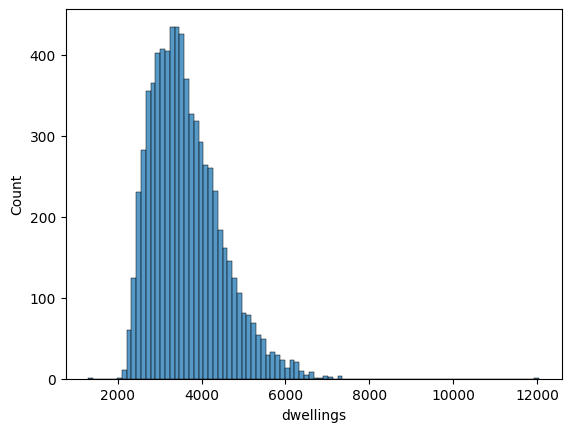

In [3]:
sns.histplot(msoa_dwelling, x = 'dwellings')

In [4]:
test = pd.read_parquet('/teamspace/studios/this_studio/enhance_ocod/data/ocod_history_processed_any_non_match/OCOD_FULL_2024_07.parquet')

## Overall figures

THe below shows the total value of all residential property as well as the total residential value

In [5]:
overall_figures = create_time_series_by_groups(msoa_dwellings = msoa_dwelling, grouping_vars=None, 
ocod_path = active_ocod_path,
class_var = active_class_var)

100%|██████████| 99/99 [00:39<00:00,  2.52it/s]


## Region figures

THe below shows the total value of all residential property as well as the total residential value

In [6]:

df_msoa_region = create_time_series_by_groups(msoa_dwellings = msoa_dwelling, grouping_vars= ['region'], 
ocod_path = active_ocod_path,
class_var = active_class_var)


100%|██████████| 99/99 [00:39<00:00,  2.48it/s]


In [7]:
fract_total = df_msoa_region[['total_value_ocod_mean', 'region']].groupby('region').mean()

print(fract_total)

(fract_total /fract_total['total_value_ocod_mean'].sum()).round(2)*100

                  total_value_ocod_mean
region                                 
EAST ANGLIA                1.057415e+09
EAST MIDLANDS              9.221592e+08
GREATER LONDON             7.695317e+10
NORTH                      6.534764e+08
NORTH WEST                 3.653159e+09
SOUTH EAST                 7.341931e+09
SOUTH WEST                 1.804032e+09
WALES                      5.574093e+08
WEST MIDLANDS              1.285578e+09
YORKS AND HUMBER           1.562750e+09


,total_value_ocod_mean
region,
EAST ANGLIA,1.0
EAST MIDLANDS,1.0
GREATER LONDON,80.0
NORTH,1.0
NORTH WEST,4.0
SOUTH EAST,8.0
SOUTH WEST,2.0
WALES,1.0
WEST MIDLANDS,1.0


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures_any_non_match/relative_value_excluding_london.png


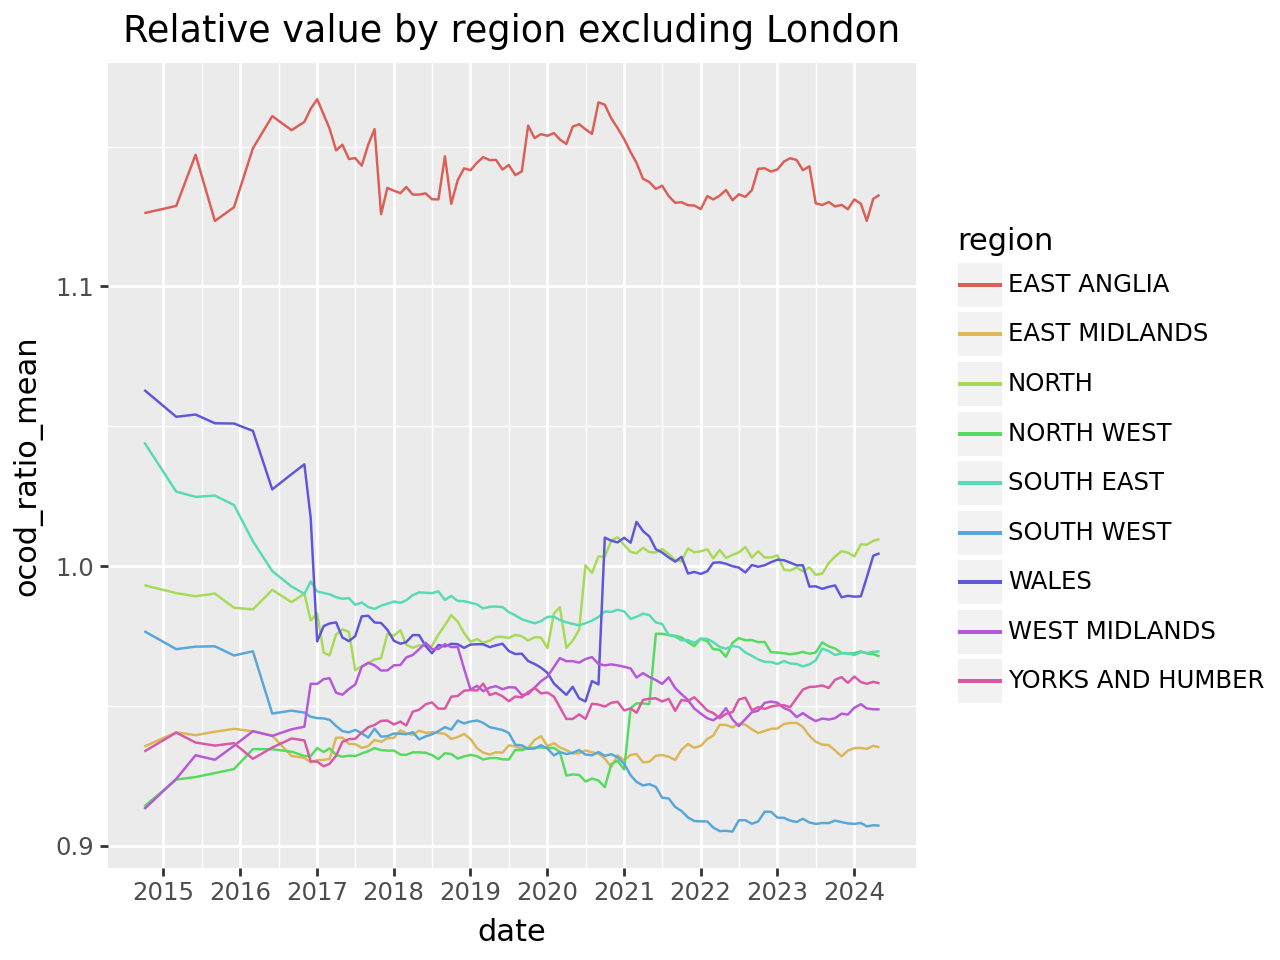

In [8]:
p = ggplot(df_msoa_region.loc[df_msoa_region['region']!='GREATER LONDON'], aes(x = 'date', y = 'ocod_ratio_mean', color = 'region')) + geom_line() + labs(
    title = "Relative value by region excluding London") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_region['date'].min(), end=df_msoa_region['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 )

p.save(filename = figures_folder / 'relative_value_excluding_london.png')

p

In [9]:
df_msoa_region

,date,year,month,ocod_mean,ocod_median,dwelling_mean,dwelling_median,ocod_ratio_mean,ocod_total_counts,total_dwelling_count,total_value_ocod_mean,total_value_dwelling_mean,fraction_of_total_value,region
0,2015-10-01,2015,10,250034,218360,222011,196941,1.126220,2184,877279,546074560,194766296351,0.002804,EAST ANGLIA
1,2015-10-01,2015,10,153771,139468,164383,147612,0.935442,4118,1582895,633229999,260201929359,0.002434,EAST MIDLANDS
2,2015-10-01,2015,10,1180707,848040,512844,425842,2.302273,55383,3374535,65391143692,1730611083405,0.037785,GREATER LONDON
3,2015-10-01,2015,10,143585,131148,144574,129962,0.993156,5323,1113510,764304101,160985332606,0.004748,NORTH
4,2015-10-01,2015,10,136044,122171,148839,133253,0.914034,16814,2663399,2287456170,396420137082,0.005770,NORTH WEST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,2025-05-01,2025,5,445877,398237,459917,412534,0.969473,20511,4225388,9145387976,1943328987497,0.004706,SOUTH EAST
986,2025-05-01,2025,5,338444,302042,373083,331867,0.907157,6598,1835984,2233059589,684974809789,0.003260,SOUTH WEST
987,2025-05-01,2025,5,243516,225048,242405,218759,1.004583,3008,851909,732496131,206507130046,0.003547,WALES
988,2025-05-01,2025,5,265313,239547,279650,255051,0.948731,5817,1612646,1543327883,450977916372,0.003422,WEST MIDLANDS


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures_any_non_match/relative_value_region.png


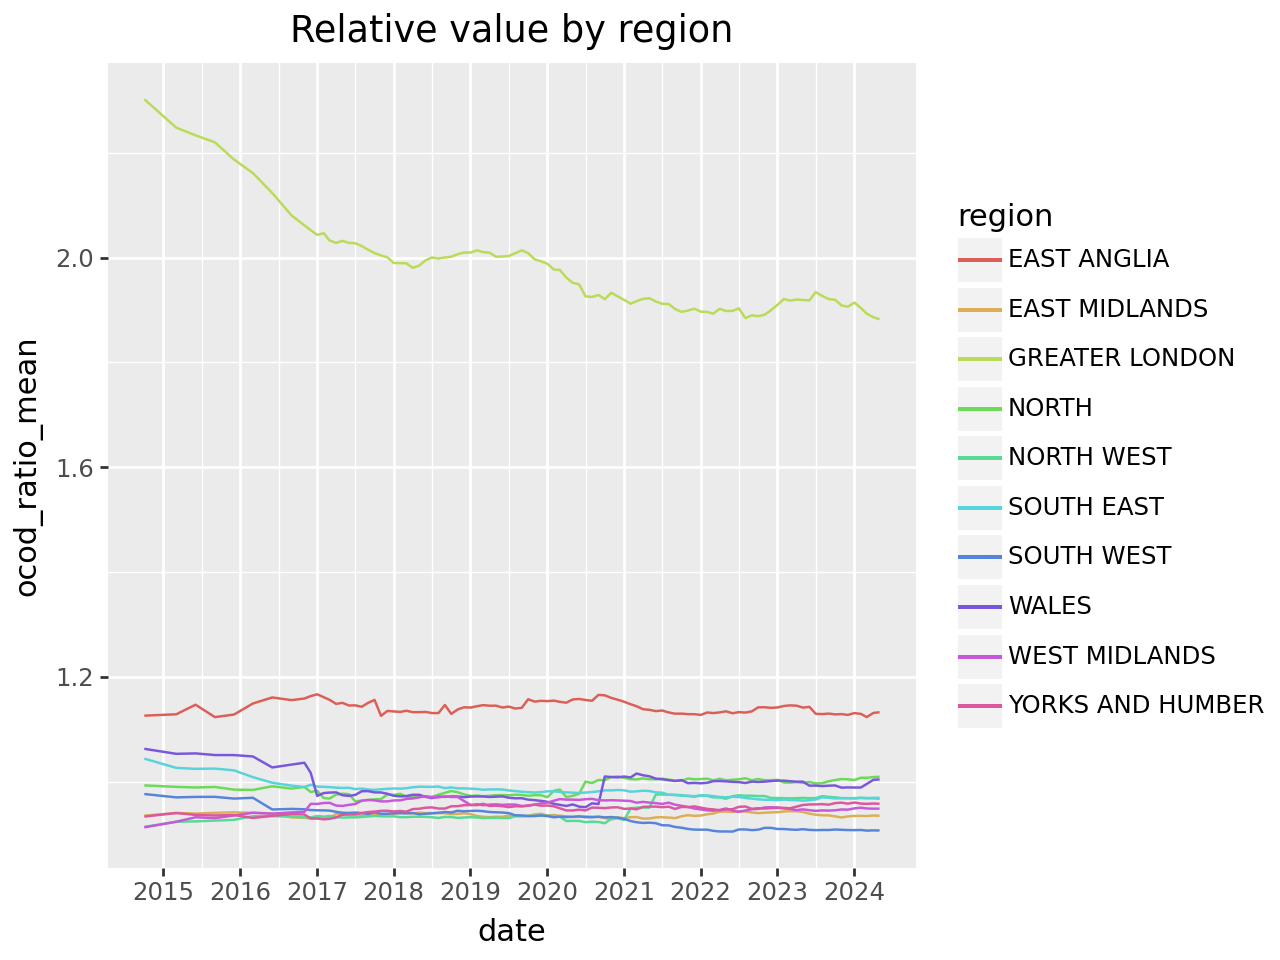

In [10]:
p = ggplot(df_msoa_region, aes(x = 'date', y = 'ocod_ratio_mean', color = 'region')) + geom_line() + labs(
    title = "Relative value by region") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_region['date'].min(), end=df_msoa_region['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 )


p.save(filename = figures_folder / 'relative_value_region.png')

p

In [11]:
df_msoa_nested = create_time_series_by_groups(msoa_dwellings = msoa_dwelling, grouping_vars= ['is_multi'],
ocod_path = active_ocod_path,
class_var = active_class_var)

100%|██████████| 99/99 [00:38<00:00,  2.54it/s]


In [12]:
df_msoa_nested

,date,year,month,ocod_mean,ocod_median,dwelling_mean,dwelling_median,ocod_ratio_mean,ocod_total_counts,total_dwelling_count,total_value_ocod_mean,total_value_dwelling_mean,fraction_of_total_value,is_multi
0,2015-10-01,2015,10,778410,566296,258474,224941,3.011552,67186,20712534,52298303058,5353671615010,0.009769,False
1,2015-10-01,2015,10,459584,360210,303739,254643,1.513085,57628,6736924,26484934998,2046272983166,0.012943,True
2,2016-03-01,2016,3,806349,590290,266957,232943,3.020515,66336,20445638,53489993377,5458117468101,0.009800,False
3,2016-03-01,2016,3,478370,377654,315253,265426,1.517416,62361,6947003,29831653223,2190065204079,0.013621,True
4,2016-06-01,2016,6,818329,602138,271498,237241,3.014123,66128,20271169,54114477078,5503587273473,0.009833,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2025-03-01,2025,3,605107,477741,440119,375382,1.374870,77174,7387399,46698568941,3251341296391,0.014363,True
194,2025-04-01,2025,4,980706,692570,395548,347150,2.479356,56386,18141585,55298122286,7175883990923,0.007706,False
195,2025-04-01,2025,4,603471,476665,440206,375641,1.370883,77319,7395318,46659826841,3255467654030,0.014333,True
196,2025-05-01,2025,5,978395,693034,395911,347638,2.471248,56361,18130179,55143363958,7177949150532,0.007682,False


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures_any_non_match/relative_value_nested.png


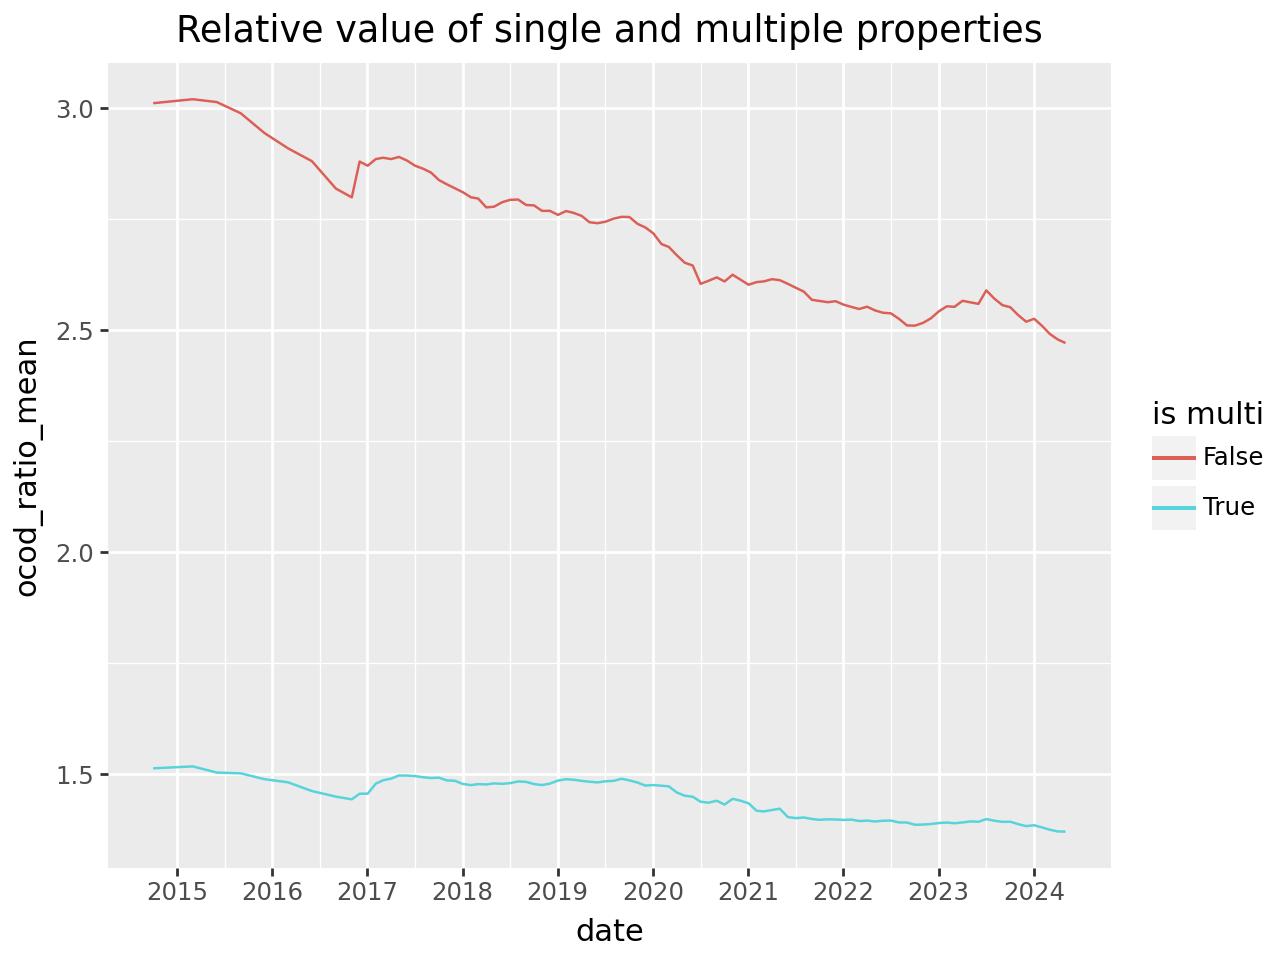

In [13]:
p = ggplot(df_msoa_nested, aes(x = 'date', y = 'ocod_ratio_mean', color = 'is_multi')) + geom_line() + labs(
    title = "Relative value of single and multiple properties",
    color = 'is multi') +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_nested['date'].min(), end=df_msoa_nested['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 )

p.save(filename = figures_folder / 'relative_value_nested.png')

p

In [14]:
df_msoa_nested

,date,year,month,ocod_mean,ocod_median,dwelling_mean,dwelling_median,ocod_ratio_mean,ocod_total_counts,total_dwelling_count,total_value_ocod_mean,total_value_dwelling_mean,fraction_of_total_value,is_multi
0,2015-10-01,2015,10,778410,566296,258474,224941,3.011552,67186,20712534,52298303058,5353671615010,0.009769,False
1,2015-10-01,2015,10,459584,360210,303739,254643,1.513085,57628,6736924,26484934998,2046272983166,0.012943,True
2,2016-03-01,2016,3,806349,590290,266957,232943,3.020515,66336,20445638,53489993377,5458117468101,0.009800,False
3,2016-03-01,2016,3,478370,377654,315253,265426,1.517416,62361,6947003,29831653223,2190065204079,0.013621,True
4,2016-06-01,2016,6,818329,602138,271498,237241,3.014123,66128,20271169,54114477078,5503587273473,0.009833,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2025-03-01,2025,3,605107,477741,440119,375382,1.374870,77174,7387399,46698568941,3251341296391,0.014363,True
194,2025-04-01,2025,4,980706,692570,395548,347150,2.479356,56386,18141585,55298122286,7175883990923,0.007706,False
195,2025-04-01,2025,4,603471,476665,440206,375641,1.370883,77319,7395318,46659826841,3255467654030,0.014333,True
196,2025-05-01,2025,5,978395,693034,395911,347638,2.471248,56361,18130179,55143363958,7177949150532,0.007682,False


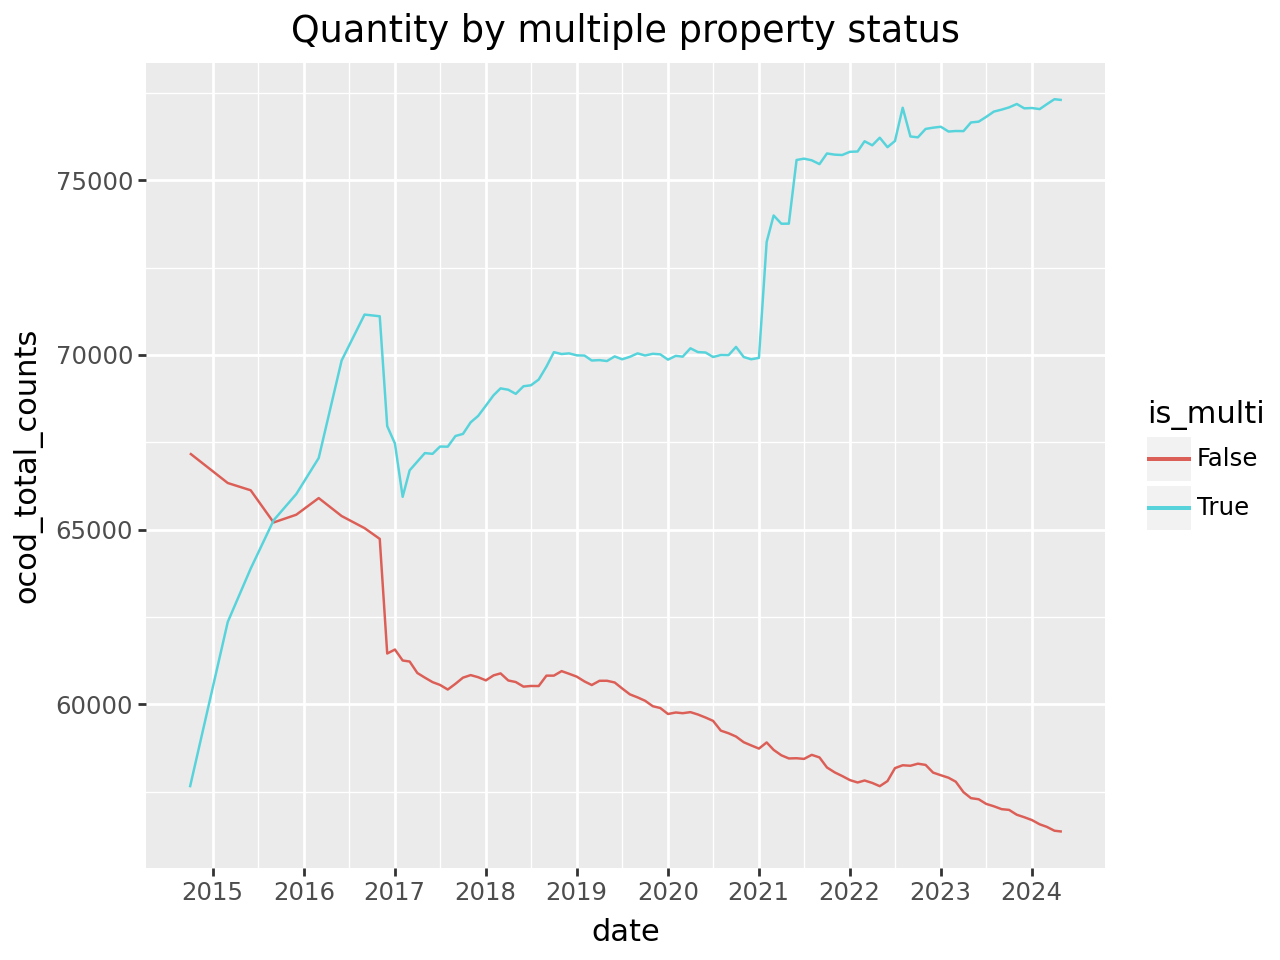

In [15]:
p = ggplot(df_msoa_nested, aes(x = 'date', y = 'ocod_total_counts', color = 'is_multi')) + geom_line() + labs(
    title = "Quantity by multiple property status") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_region['date'].min(), end=df_msoa_region['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 )

p

# Country of Incorporation
 

In [16]:
df_msoa_incorporated = create_time_series_by_groups( msoa_dwellings = msoa_dwelling, 
grouping_vars=  ['country_incorporated'], 
ocod_path = '../data/ocod_history_processed',
class_var = 'class2')

100%|██████████| 99/99 [00:47<00:00,  2.07it/s]


In [17]:
df_msoa_incorporated.to_csv('country.csv')

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures_any_non_match/relative_value_incorporation.png


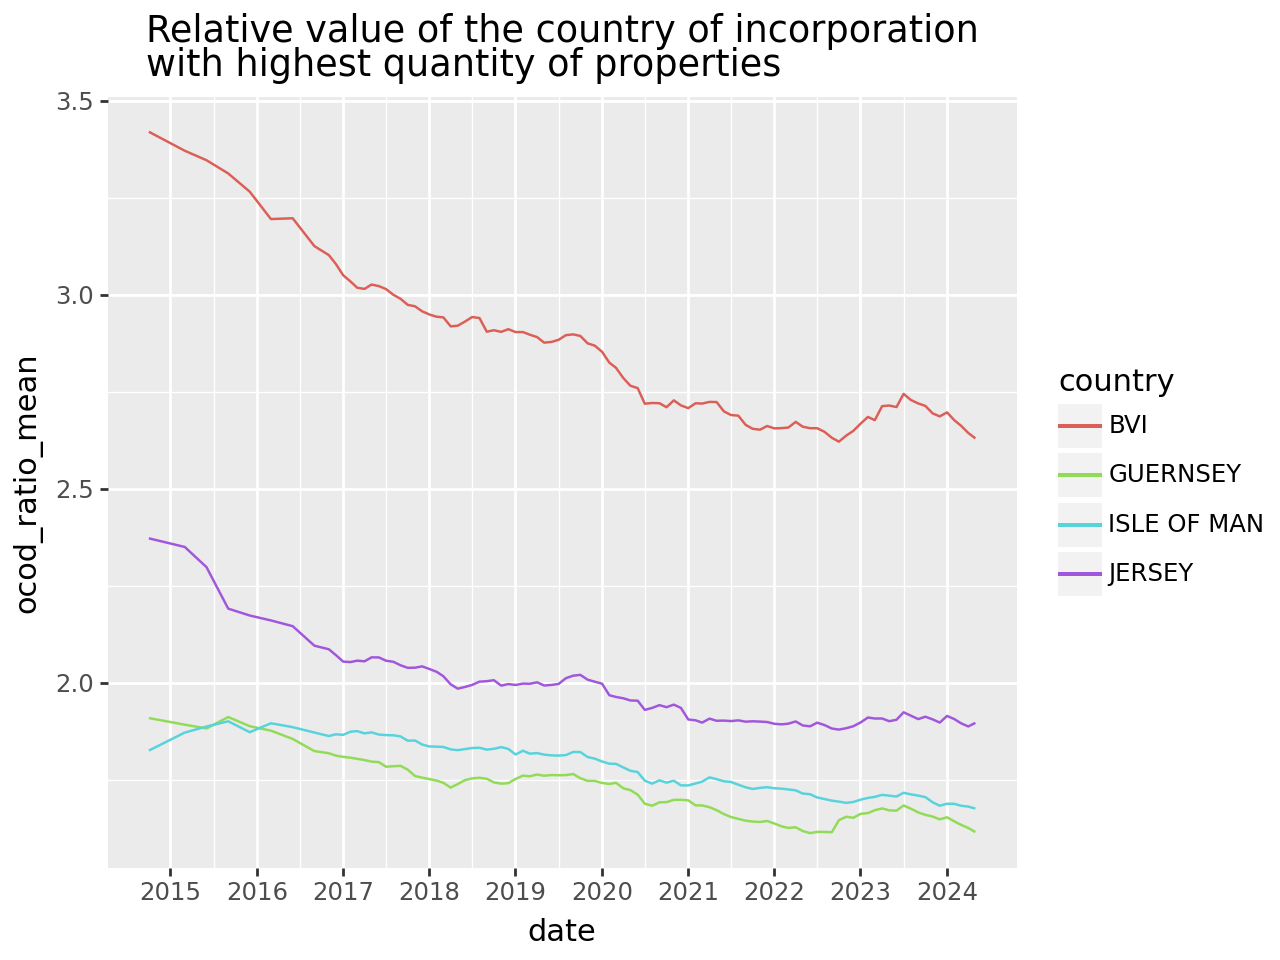

In [18]:
df_msoa_incorporated['country_incorporated'] = df_msoa_incorporated['country_incorporated'].str.replace("BRITISH VIRGIN ISLANDS", "BVI")

p =  ggplot(df_msoa_incorporated.loc[df_msoa_incorporated['country_incorporated'].isin(['JERSEY', 'GUERNSEY', 
'ISLE OF MAN', 'BRITISH VIRGIN ISLANDS', 'BVI'])], 
aes(x = 'date', y = 'ocod_ratio_mean', color = 'country_incorporated')) + geom_line() + labs(
    title = "Relative value of the country of incorporation\nwith highest quantity of properties") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_incorporated['date'].min(), end=df_msoa_incorporated['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 ) + \
  guides(color = guide_legend(title = "country")) 

p.save(filename = figures_folder / 'relative_value_incorporation.png')

p

In [19]:
df_msoa_incorporated

,date,year,month,ocod_mean,ocod_median,dwelling_mean,dwelling_median,ocod_ratio_mean,ocod_total_counts,total_dwelling_count,total_value_ocod_mean,total_value_dwelling_mean,fraction_of_total_value,country_incorporated
0,2015-10-01,2015,10,122117,112500,122117.0,112500.0,1.000000,4,4941,488469,6.033814e+08,0.000810,00002065
1,2015-10-01,2015,10,111820,100000,111820.0,100000.0,1.000000,1,4349,111820,4.863088e+08,0.000230,0003280
2,2015-10-01,2015,10,161230,140000,161230.0,140000.0,1.000000,1,5516,161230,8.893452e+08,0.000181,085544C
3,2015-10-01,2015,10,434115,354300,434115.0,354300.0,1.000000,2,4166,868231,1.808526e+09,0.000480,1005646
4,2015-10-01,2015,10,516244,439975,516244.0,439975.0,1.000000,1,6488,516244,3.349392e+09,0.000154,1012258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19612,2025-05-01,2025,5,511530,445185,519692.0,447205.0,0.984294,8,20092,4092240,1.044166e+10,0.000392,"WASHINGTON, U.S.A."
19613,2025-05-01,2025,5,3213261,1501000,3213261.0,1501000.0,1.000000,2,3806,6426522,1.222967e+10,0.000525,WESTERN SAMOA
19614,2025-05-01,2025,5,280000,237583,271639.0,226850.0,1.030778,3,12828,840000,3.484592e+09,0.000241,"WISCONSIN, U.S.A."
19615,2025-05-01,2025,5,1269905,893861,1272719.0,842900.0,0.997789,18,44906,22858299,5.715273e+10,0.000400,"WYOMING, U.S.A."


In [20]:
df_msoa_incorporated.loc[df_msoa_incorporated['country_incorporated'].isin(['BVI', 'JERSEY', 'GUERNSEY', 'ISLO OF MAN']),
'ocod_total_counts':]

,ocod_total_counts,total_dwelling_count,total_value_ocod_mean,total_value_dwelling_mean,fraction_of_total_value,country_incorporated
52,21052,9275375,24114955272,3.107058e+12,0.007761,BVI
88,10494,8031482,6449650071,2.586548e+12,0.002494,GUERNSEY
112,14671,11989840,9671866230,3.332810e+12,0.002902,JERSEY
268,21206,9297365,24684066037,3.210709e+12,0.007688,BVI
305,10788,8260338,6708633510,2.715956e+12,0.002470,GUERNSEY
...,...,...,...,...,...,...
19297,12292,9198714,8822687626,4.063041e+12,0.002171,GUERNSEY
19315,15440,10688149,12282698959,4.506460e+12,0.002726,JERSEY
19452,18390,7313882,24552579791,3.713770e+12,0.006611,BVI
19487,12240,9201632,8726226299,4.063262e+12,0.002148,GUERNSEY


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures_any_non_match/relative_value_incorporation_increases.png


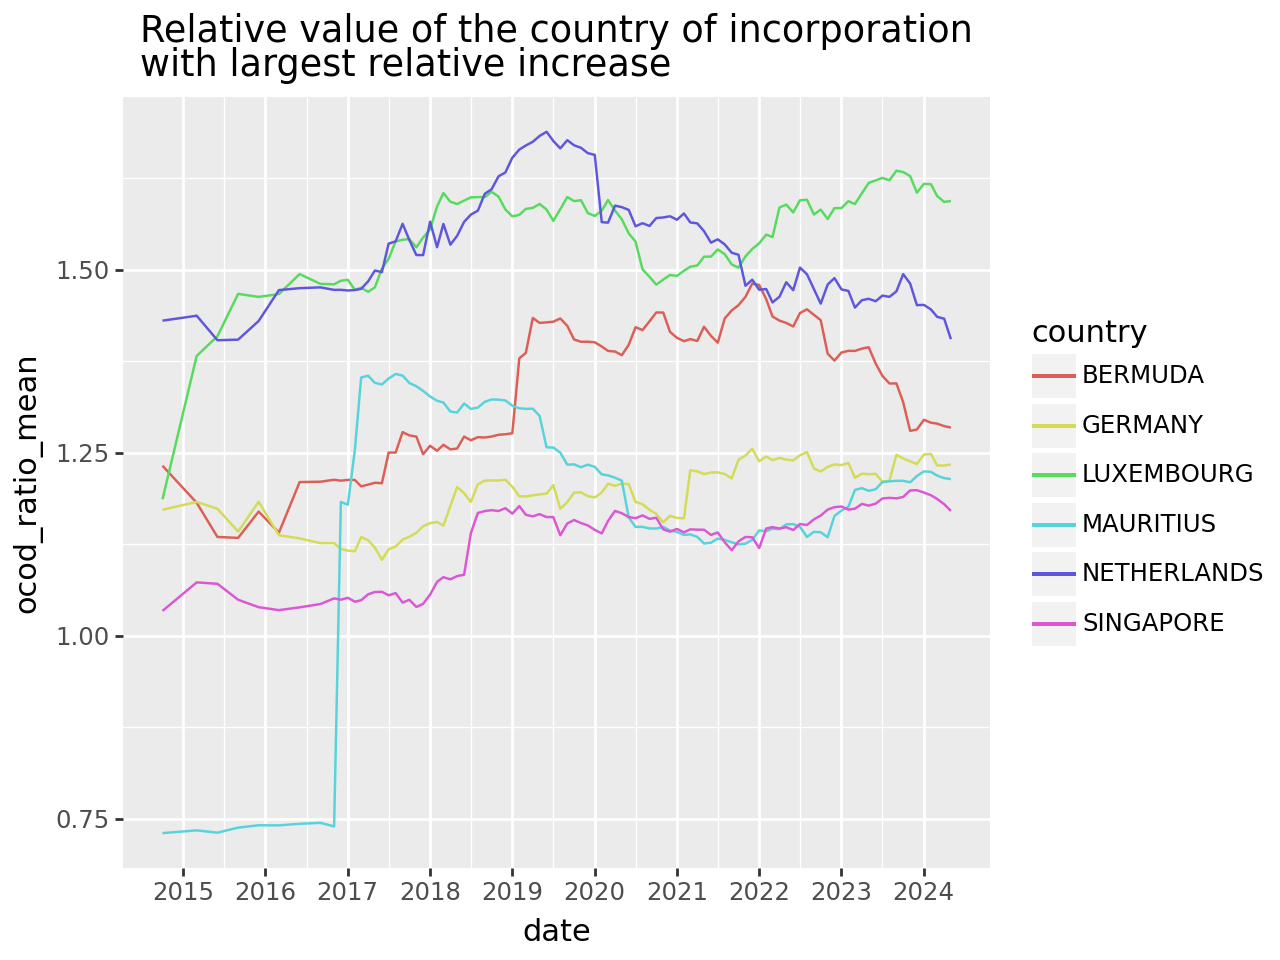

In [21]:
df_msoa_incorporated['country_incorporated'] = df_msoa_incorporated['country_incorporated'].str.replace("BRITISH VIRGIN ISLANDS", "BVI")

p = ggplot(df_msoa_incorporated.loc[df_msoa_incorporated['country_incorporated'].isin([ 'LUXEMBOURG', 'MAURITIUS', 
'SINGAPORE', 'GERMANY', 'BERMUDA', 'NETHERLANDS'])], 
aes(x = 'date', y = 'ocod_ratio_mean', color = 'country_incorporated')) + geom_line() + labs(
    title = "Relative value of the country of incorporation\nwith largest relative increase") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_incorporated['date'].min(), end=df_msoa_incorporated['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 ) + \
  guides(color = guide_legend(title = "country")) 

p.save(filename = figures_folder / 'relative_value_incorporation_increases.png')

p

In [22]:
countries = [
    "JERSEY",
    "BVI",
    "GUERNSEY",
    "ISLE OF MAN",
    "GIBRALTAR",
    "LUXEMBOURG",
    "SINGAPORE",
    "IRELAND",
    "HONG KONG",
    "PANAMA",
    "CAYMAN ISLANDS",
    "SEYCHELLES",
    "NETHERLANDS",
    "CYPRUS",
    "BAHAMAS",
    "MAURITIUS",
    "GERMANY",
    "AUSTRALIA",
    "BERMUDA",
    "DELAWARE, U.S.A."
]

In [23]:
df = df_msoa_incorporated.loc[df_msoa_incorporated['country_incorporated'].isin(countries)]

# Get values at min and max dates
grouped = df.groupby('country_incorporated').apply(
    lambda x: pd.Series({
        'min_date_value': x.loc[x['date'].idxmin(), 'ocod_ratio_mean'],
        'max_date_value': x.loc[x['date'].idxmax(), 'ocod_ratio_mean']
    })
)

# Calculate ratio of change
grouped['ratio_change'] = grouped['max_date_value'] / grouped['min_date_value']
result = grouped['ratio_change']

result.sort_values().reset_index()

/tmp/ipykernel_441902/1438688812.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


,country_incorporated,ratio_change
0,AUSTRALIA,0.640416
1,BVI,0.768906
2,JERSEY,0.799452
3,CAYMAN ISLANDS,0.827457
4,GUERNSEY,0.845989
5,BAHAMAS,0.858812
6,SEYCHELLES,0.875898
7,PANAMA,0.908151
8,GIBRALTAR,0.916645
9,ISLE OF MAN,0.918069


In [24]:

df_msoa_region_nested = create_time_series_by_groups(  msoa_dwellings = msoa_dwelling, grouping_vars = ['region', 'is_multi'], 
ocod_path = active_ocod_path,
class_var = active_class_var)

100%|██████████| 99/99 [00:45<00:00,  2.20it/s]


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures_any_non_match/relative_value_nested_region.png


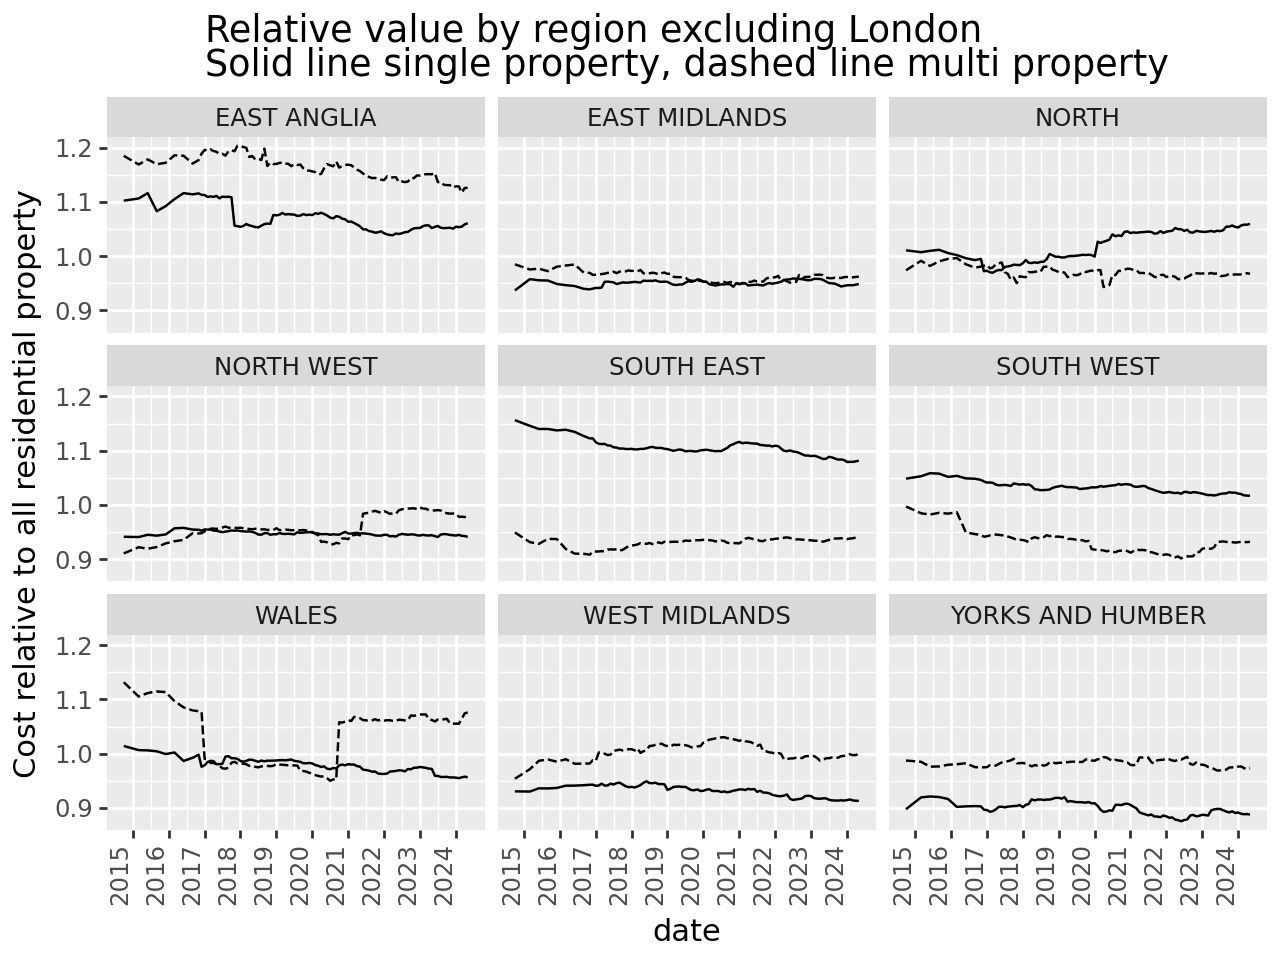

In [25]:
p = ggplot(df_msoa_region_nested.loc[df_msoa_region_nested['region']!='GREATER LONDON'], 
aes(x = 'date', y = 'ocod_ratio_mean', linetype = 'is_multi')) + geom_line() + labs(
    title = "Relative value by region excluding London\nSolid line single property, dashed line multi property",
    linetype = 'nested',
    y = 'Cost relative to all residential property') +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_region_nested['date'].min(), end=df_msoa_region_nested['date'].max(), freq='YE'),
     date_labels='%Y'
 ) + facet_wrap("region") +\
    theme(
        axis_text_x=element_text(angle=90,hjust = 1),
        legend_position = 'none'
    )


p.save(filename = figures_folder / 'relative_value_nested_region.png')

p

In [26]:
df_msoa_lad = create_time_series_by_groups(msoa_dwellings = msoa_dwelling, grouping_vars = ['lad11cd'], 
ocod_path = active_ocod_path,
class_var = active_class_var )


100%|██████████| 99/99 [01:05<00:00,  1.51it/s]


In [27]:
df_msoa_lad

,date,year,month,ocod_mean,ocod_median,dwelling_mean,dwelling_median,ocod_ratio_mean,ocod_total_counts,total_dwelling_count,total_value_ocod_mean,total_value_dwelling_mean,fraction_of_total_value,lad11cd
0,2015-10-01,2015,10,83332,72836,106559,98052,0.782032,34,23026,2833312,2453632836,0.001155,E06000001
1,2015-10-01,2015,10,104039,90897,115973,103273,0.897101,97,44865,10091834,5203129969,0.001940,E06000002
2,2015-10-01,2015,10,103438,97602,115778,106697,0.893414,101,32281,10447254,3737447604,0.002795,E06000003
3,2015-10-01,2015,10,151738,139486,135669,124172,1.118447,139,60024,21091673,8143402140,0.002590,E06000004
4,2015-10-01,2015,10,112645,100574,130963,120249,0.860132,81,33730,9124317,4417397158,0.002066,E06000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31477,2025-05-01,2025,5,271901,247692,284665,264464,0.955163,13,6272,3534724,1785421339,0.001980,W06000020
31478,2025-05-01,2025,5,358503,330273,367073,334622,0.976654,20,25100,7170073,9213537027,0.000778,W06000021
31479,2025-05-01,2025,5,222150,209966,227037,213066,0.978474,75,41400,16661271,9399352747,0.001773,W06000022
31480,2025-05-01,2025,5,276903,250694,260964,233924,1.061077,9,25679,2492129,6701304058,0.000372,W06000023


In [28]:
df_msoa_lad['fraction'] = df_msoa_lad.groupby('date')['total_value_ocod_mean'].transform(lambda x: x / x.sum())

In [29]:
df_msoa_lad.groupby('lad11cd')[['fraction', 'total_value_ocod_mean']].mean().sort_values('fraction').sort_values('fraction',ascending = False)

,fraction,total_value_ocod_mean
lad11cd,,
E09000033,0.329415,3.153651e+10
E09000020,0.180575,1.720410e+10
E09000007,0.040561,3.884852e+09
E09000013,0.032197,3.071707e+09
E09000032,0.030750,2.958940e+09
...,...,...
E06000012,0.000023,2.196461e+06
E06000017,0.000023,2.130850e+06
E06000053,0.000015,1.391240e+06


In [30]:
df_msoa_lad.to_csv('../data/lad.csv')